# Lesson 04: Drainage capture

# *This lesson has been written by Simon M. Mudd at the University of Edinburgh*

*Last update 11/09/2020*

So far you should have learned:
    
* Typical channels have a concave up profile. And there is a power law relasionship between slope and drainage areas: $S = k_s A^{-\theta}$
* The steepness of channels (as indicated by the steepness index $k_s$) is thought to be related to erosion rates. And the stream power law proposes a relasionship between channel steepness, erodibility, and uplift rates. Despite many flaws, the stream power law has been used to help with conceptual models of channel evolution. 
* The stream power law (and its more complex variants) all suggest that changes in erosion rates will propigate upstream. If erosion rates increase, a **knickzone** will move upstream. 

We have run some simulations where chaning the uplift rate can change the profile of the river. 

But other things can change the channel profile. One interesting process is **drainage capture**.

A river's drainage area can change if one side of a drainage divide is eroding more quickly than the other, and the divide migrates into the slowly eroding landscape. 

An extreme version of this is drainage capture. Drainage capture can happen when the headwaters of one river erode into another river, and capture the other river's drainage area. Suddenly, a small headwater catchement can have a much larger river running down it. Because the headwaters will be relatively steep, this section of the river, now with much more discharge, should erode quickly. 

We can use our toy channel model to see what this erosion might look like. 



In [3]:
!pip install channeltoy

In [4]:
import channeltoy as ct
import matplotlib.pyplot as plt
import numpy as np

Set up a channel

In [5]:
initial_channel = ct.channeltoy(spacing=500, U = 0.0002,K = 0.00005,n=1)

K is: 5e-05
U is: 0.0002


The channel toy allows you to splice on a channel above the one you have just made. This new channel is basically just another steady state channel that you attache to the top of the first channel. It approximates what would happen if a headwater channel erodes into another channel.
You can edit the parameters of the new channel (like the rho values, the X_0 value, etc) and also the `capture_location_fraction` which is just how far upstream in the new channel the capture occurs (so 0.5 is when the initial channel captures the new channel at the halfway point). 

Capture index is:10
X locations are:
[ 5000  5500  6000  6500  7000  7500  8000  8500  9000  9500 10000]




old z
[ 0.          1.19970336  2.45311454  3.76592088  5.14480289  6.59768499
  8.13407184  9.76550835 11.5062226  13.37404774 15.3917835  17.58927832
 20.00675004 22.70036106 25.75220119 29.28971862 33.52805771 38.87857874
 46.30928333]
capture z
[46.30928333 48.32669228 50.52379162 52.94077392 55.63376172 58.6847781
 62.22114979 66.45777313 71.80540662 79.23009778 92.2366275 ]




z lower is: 46.309283325495954
z diff is: -31.785976606712175
z capture: 46.309283325495954
new z is: 
[46.30928333 48.32669228 50.52379162 52.94077392 55.63376172 58.6847781
 62.22114979 66.45777313 71.80540662 79.23009778 92.2366275 ]
x lower is: 5000
x diff is: -4000
x capture point is: 9000
new x is:
[ 9000  9500 10000 10500 11000 11500 12000 12500 13000 13500 14000]


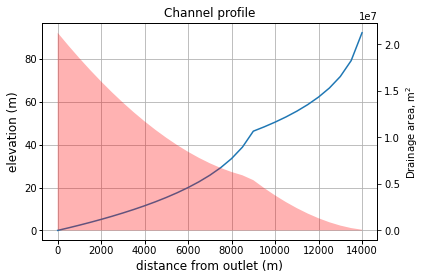

In [6]:
initial_channel.create_drainage_capture_channel(new_K = 0.00005, new_U = 0.0002, 
                                                new_max_x = 10001,new_spacing = 500, 
                                                new_X_0 = 10501, new_rho = 1.8, 
                                                capture_location_fraction = 0.5)
initial_channel.plot_channel(show_figure=True,print_to_file=False,show_area=True)

Okay, now that we have done this, we can simulate how it evolves through time:

In [7]:
initial_z = initial_channel.get_elevations()

# Now run the transient channel
times, elevations = initial_channel.transient_simulation(base_level = 0, dt = 20, 
                                                         start_time = 0, end_time = 30001, 
                                                         print_interval = 7500)


final_z = initial_channel.solve_steady_state_elevation()


Saving this timestep: 0.0
Time is: 5000.0 
Saving this timestep: 7500.0
Time is: 10000.0 
Saving this timestep: 15000.0
Time is: 20000.0 
Saving this timestep: 22500.0
Time is: 25000.0 
Saving this timestep: 30000.0
Time is: 30000.0 

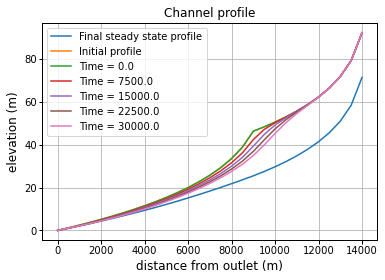

In [8]:
initial_channel.plot_transient_channel(times = times, elevations = elevations,
                                       initial_elevation = initial_z, 
                                       final_elevation =final_z,
                                      show_figure=True,print_to_file=False)

We can actually plot the depth of incision by subtracting the timesteps from the initial state of the river.

<function matplotlib.pyplot.show(*args, **kw)>

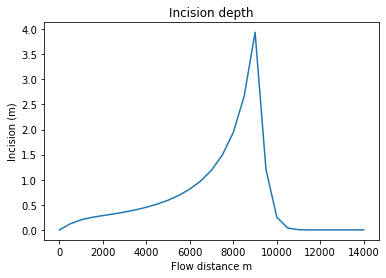

In [12]:
incision = np.subtract(initial_z,elevations[1])
flow_distance = initial_channel.x_data

plt.plot(flow_distance,incision)
plt.xlabel("Flow distance m")
plt.ylabel("Incision (m)")
plt.title("Incision depth")
plt.show